In [395]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

In [396]:
df = pd.read_csv("/home/satire/PycharmProjects/Statistics/csv/Student_Performance.csv")
df.sample(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
8100,7,41,No,7,6,31.0
9982,8,51,No,5,1,44.0
3493,9,54,Yes,9,0,52.0
3412,8,62,No,9,8,62.0
2369,9,79,No,4,7,77.0
3714,3,87,Yes,4,4,65.0
3133,8,76,Yes,4,6,71.0
6537,9,81,No,4,2,76.0
3560,9,74,Yes,6,5,69.0
7515,7,59,Yes,8,6,49.0


In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [398]:
print(df.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [399]:
dummies = pd.get_dummies(df[['Extracurricular Activities']], dtype=float)

In [400]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Extracurricular Activities_No   10000 non-null  float64
 1   Extracurricular Activities_Yes  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [401]:
y =  df[['Performance Index']]

In [402]:
X_numerical = df.drop(['Extracurricular Activities', 'Performance Index'], axis=1).astype('float64')

In [403]:
list_numerical = X_numerical.columns
list_numerical

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')

In [404]:
X = pd.concat([X_numerical, dummies[['Extracurricular Activities_Yes']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  float64
 1   Previous Scores                   10000 non-null  float64
 2   Sleep Hours                       10000 non-null  float64
 3   Sample Question Papers Practiced  10000 non-null  float64
 4   Extracurricular Activities_Yes    10000 non-null  float64
dtypes: float64(5)
memory usage: 390.8 KB


In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [406]:
model = LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_test, y_test)
y_test_pred = model.predict(X_test)
print(r_squared)

0.9887943379514139


In [407]:
print('mean_squared_error : ', mean_squared_error(y_test, y_test_pred))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_test_pred))

mean_squared_error :  4.192884822397504
mean_absolute_error :  1.6274779468696452


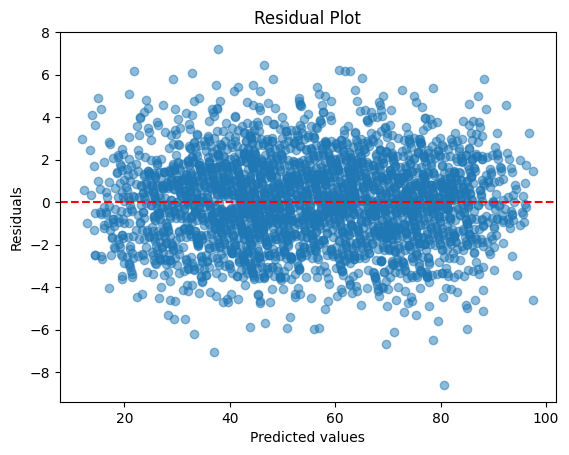

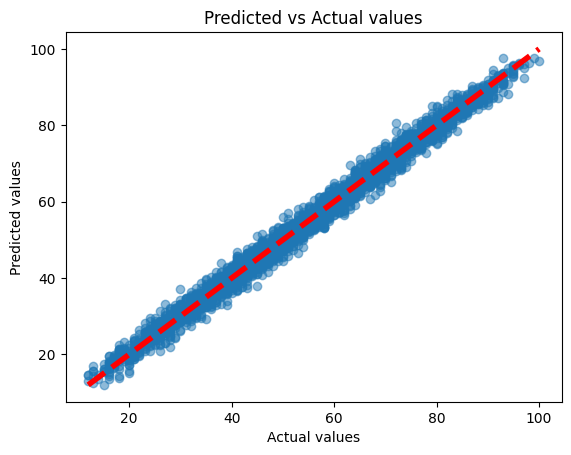

In [408]:
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.show()

Statsmodel

In [409]:
df = pd.get_dummies(df, dtype=float)
df = df.drop(columns=['Extracurricular Activities_Yes'])
x = df[['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Extracurricular Activities_No']]
y = df['Performance Index']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:26:50   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [410]:
print("Parameters: ", model.params)
print("R2: ", model.rsquared)

Parameters:  const                              -33.462691
Hours Studied                        2.852982
Previous Scores                      1.018434
Sleep Hours                          0.480560
Sample Question Papers Practiced     0.193802
Extracurricular Activities_No       -0.612898
dtype: float64
R2:  0.9887523323780958


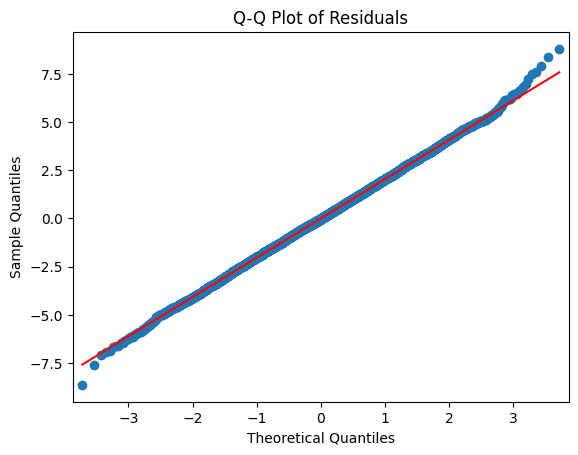

In [411]:
sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()